In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pylab as rcParams
from datetime import datetime
#rom pandas import datetime
from sklearn import metrics

from sklearn.preprocessing import scale, StandardScaler, normalize
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
color = sb.color_palette()

In [6]:
##Main Data Source
df=pd.read_excel("http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx")


In [7]:
#Checking from upper side 4 rows Data
df.head(4)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
#Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [10]:
# descriptive statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021475CB3310>]],
      dtype=object)

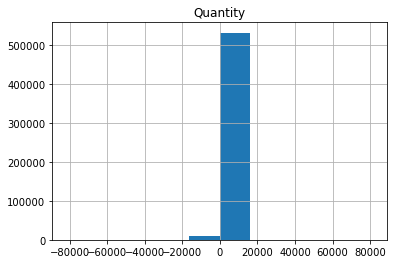

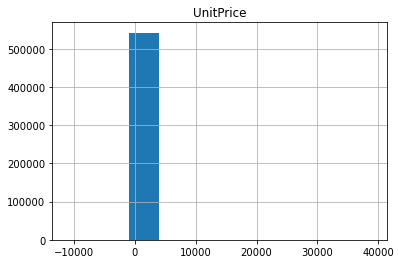

In [11]:
#Checking the frequency of Quantity and UnitPrice
df.hist(column='Quantity')
df.hist(column='UnitPrice')

In [12]:
#Chwecking the total null value of UnitPrice
df[df.UnitPrice<=0].sum()

Quantity                                                -134352
UnitPrice                                              -22124.1
CustomerID                                               568689
Country       United KingdomUnited KingdomUnited KingdomUnit...
dtype: object

In [13]:
#Chwecking the Null value of UnitPrice
df[df.UnitPrice<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,NaN,United Kingdom


In [14]:
#Chwecking the Null value of Quantity
df[df.Quantity<=0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [15]:
# Checking total null values in the DataSet
df.isnull().values.sum()

136534

In [16]:
# removing missing values, quantity and unit price with 0 values and Quantity = 134352
df = df[df.CustomerID.notnull() & (df.Quantity > 0) & (df.UnitPrice > 0) & (df.Quantity < 134352)]
# drop rows with missing value
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021471651700>]],
      dtype=object)

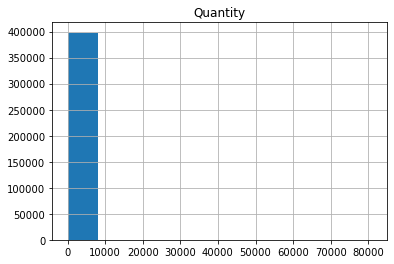

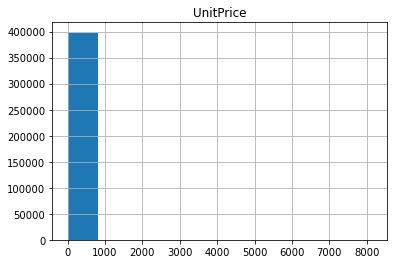

In [18]:
# Checking again the frequency of Quantity and UnitPrice
df.hist(column='Quantity')
df.hist(column='UnitPrice')


In [38]:
#The index of the DataFrame.
df.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            541899, 541900, 541901, 541902, 541903, 541904, 541905, 541906,
            541907, 541908],
           dtype='int64', length=397884)

In [39]:
#Total number of columns and rows
df.shape

(397884, 8)

In [40]:
#Print the Columns Name
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [41]:
#Checking the missing value
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [42]:
#Check the missing values inside the rows
df[df.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [43]:
#Change the 'InvoiceDate' format (String to TimeStamp)
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')

In [44]:
# examine duplicated rows
df.loc[df.duplicated(), :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [45]:
##REMOVE ALL MISSING & DUPLICATE VALUES
df1=df.dropna()

In [46]:
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [48]:
#Change the type customerID to Integer 
df1['CustomerID'] = df1['CustomerID'].astype('int64')

In [49]:
#Check the data types
df1.info()
df1.dtypes # Data Types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int64         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.3+ MB


InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

In [50]:
df1.shape

(397884, 8)

In [51]:
#After Cleaning the New DataSet
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [52]:
df1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom


In [56]:
# Creating a new DataFrame and a new Column to findout the total Sales
df2=df1['Total_Sales'] = df1.Quantity * df1.UnitPrice
df2=df1[['InvoiceNo','InvoiceDate','StockCode','Description','Quantity','UnitPrice','Total_Sales','CustomerID','Country']]



In [59]:
df2.head(10)

,InvoiceNo,InvoiceDate,Year_Month,Date,Month,Week,Day,Hour,StockCode,Description,Quantity,UnitPrice,Total_Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom
5,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,22752,SET 7 BABUSHKA NESTING BOXES,2,7.65,15.30,17850,United Kingdom
6,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,4.25,25.50,17850,United Kingdom
7,536366,2010-12-01 08:28:00,201012,2010-12-01,12,48,3,8,22633,HAND WARMER UNION JACK,6,1.85,11.10,17850,United Kingdom
8,536366,2010-12-01 08:28:00,201012,2010-12-01,12,48,3,8,22632,HAND WARMER RED POLKA DOT,6,1.85,11.10,17850,United Kingdom
9,536367,2010-12-01 08:34:00,201012,2010-12-01,12,48,3,8,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,54.08,13047,United Kingdom


In [61]:
# Add Some New Columns based on location - Month, Day and Hour for the invoice
df2.insert(loc=2, column='Year_Month', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df2.insert(loc=3, column='Date', value=df2.InvoiceDate.dt.date)
df2.insert(loc=4, column='Month', value=df2.InvoiceDate.dt.month)
df2.insert(loc=5, column='Week', value=df2.InvoiceDate.dt.week)
# +1 to make Monday=1.....until Sunday=7
df2.insert(loc=6, column='Day', value=(df2.InvoiceDate.dt.dayofweek)+1)
df2.insert(loc=7, column='Hour', value=df2.InvoiceDate.dt.hour)
df2.insert(loc=8, column='Day_of_week', value=df2.InvoiceDate.dt.day_name())

ValueError: cannot insert Year_Month, already exists

In [64]:
#Now make a New dataset after prepared everything
df3=df2.to_csv('Cleaned_DataSet.csv',index=False)

In [66]:
#Read the data from local storage
df3=pd.read_csv('data_clean.csv')

In [67]:
df3

,InvoiceNo,InvoiceDate,Year_Month,Date,Month,Week,Day,Hour,Day_of_week,StockCode,Description,Quantity,UnitPrice,Total_Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,Wednesday,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,Wednesday,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,Wednesday,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,Wednesday,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,Wednesday,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397879,581587,2011-12-09 12:50:00,201112,2011-12-09,12,49,5,12,Friday,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20,12680,France
397880,581587,2011-12-09 12:50:00,201112,2011-12-09,12,49,5,12,Friday,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60,12680,France
397881,581587,2011-12-09 12:50:00,201112,2011-12-09,12,49,5,12,Friday,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60,12680,France
397882,581587,2011-12-09 12:50:00,201112,2011-12-09,12,49,5,12,Friday,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60,12680,France


In [72]:
#Again checked the dataset
df3.isnull().sum()

InvoiceNo      0
InvoiceDate    0
Year_Month     0
Date           0
Month          0
Week           0
Day            0
Hour           0
Day_of_week    0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Total_Sales    0
CustomerID     0
Country        0
dtype: int64

In [71]:
#Making the Invoice Date as a index 
monthly_orders_df = df3.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [73]:
# Month based Total number of orders
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
    rotation=45
)

plt.show()

NameError: name 'monthly_orders_df' is not defined

In [74]:
# Checking the Minimum and Maximum Date
invoice_dates = df3.loc[
    df3['InvoiceDate'] >= '2011-12-01',
    'InvoiceDate'
]

print('Min date: %s\nMax date: %s' % (invoice_dates.min(), invoice_dates.max()))



Min date: 2011-12-01 08:33:00
Max date: 2011-12-09 12:50:00


In [75]:
# 
dfpre = df.loc[df['InvoiceDate'] < '2011-12-01']

In [76]:

monthly_orders_df = dfpre.set_index('InvoiceDate')['InvoiceNo'].resample('M').nunique()

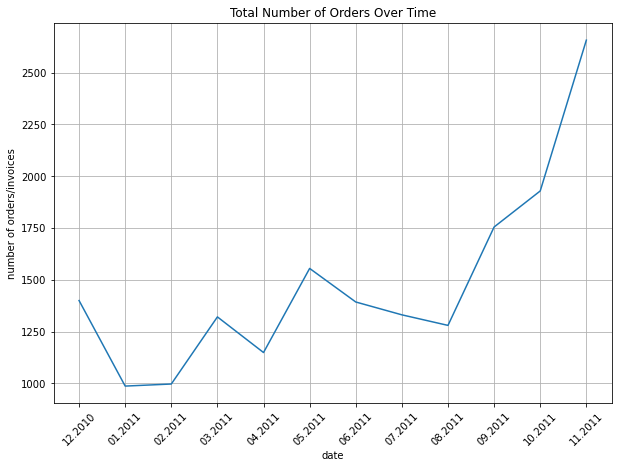

In [77]:
#Orders over Time
ax = pd.DataFrame(monthly_orders_df.values).plot(
    grid=True,
    figsize=(10,7),
    legend=False
)

ax.set_xlabel('date')
ax.set_ylabel('number of orders/invoices')
ax.set_title('Total Number of Orders Over Time')

plt.xticks(
    range(len(monthly_orders_df.index)), 
    [x.strftime('%m.%Y') for x in monthly_orders_df.index], 
    rotation=45
)

plt.show()

In [ ]:
#Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques (mostly graphical) to
#maximize insight into a data set; uncover underlying structure; extract important variables; detect outliers and anomalies; test underlying assumptions;
#develop parsimonious models; and determine optimal factor settings.

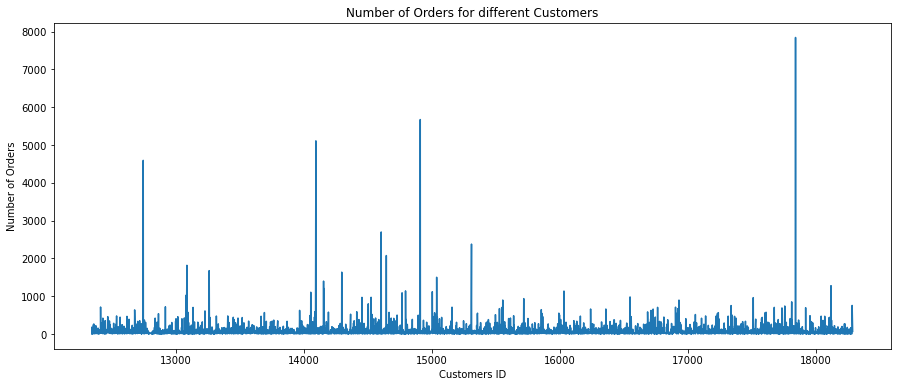

In [79]:
##EXPLORATORY DATA ANALYSIS (EDA)
#How many orders made by customers
orders = df3.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [80]:
#Highest orders made by customers
orders.sort_values(by='InvoiceNo', ascending=False).head()

,CustomerID,Country,InvoiceNo
4018,17841,United Kingdom,7847
1887,14911,EIRE,5675
1297,14096,United Kingdom,5111
334,12748,United Kingdom,4595
1669,14606,United Kingdom,2700


InvoiceNo
536365    [201012]
538654    [201012]
538653    [201012]
538652    [201012]
538651    [201012]
            ...   
580490    [201112]
580500    [201112]
580501    [201112]
580397    [201112]
581587    [201112]
Name: Year_Month, Length: 18532, dtype: object

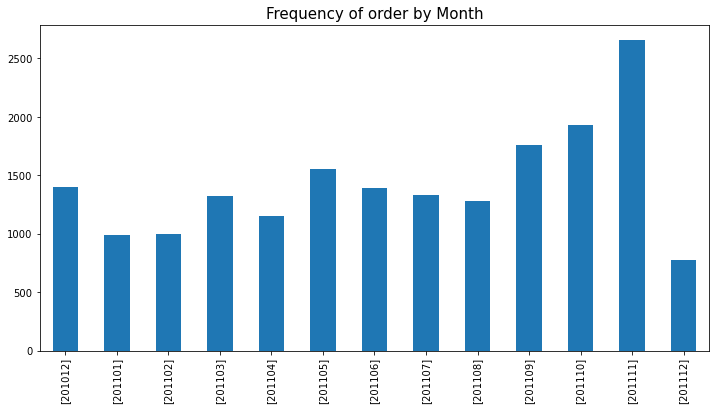

In [84]:
##How many orders made per months
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Month", fontsize=15)
InvoiceDate = df3.groupby(['InvoiceNo'])['Year_Month'].unique()
InvoiceDate.value_counts().sort_index().plot.bar()
InvoiceDate.sort_values(ascending=True)
#plt.savefig('Order_by_month.png')

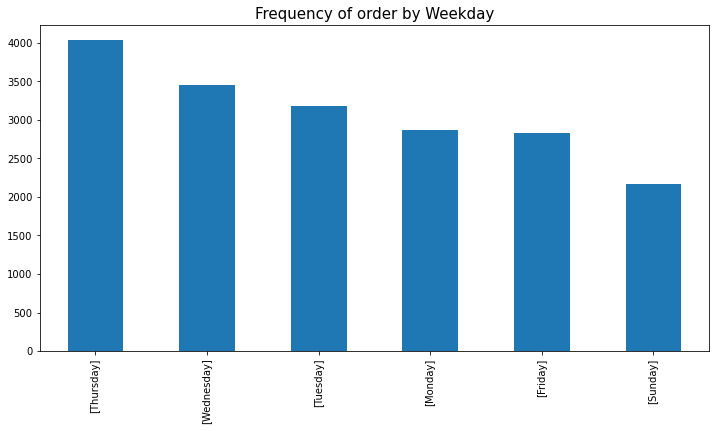

In [86]:
##Orders made by Day
#[0] ~ Sunday
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Weekday", fontsize=15)
InvoiceDate = df3.groupby(['InvoiceNo'])['Day_of_week'].unique()
#InvoiceDate = df6.groupby(['Day_of_week'])['InvoiceNo'].unique()
#InvoiceDate.value_counts().plot.bar()
InvoiceDate.sort_values(ascending=True).value_counts().plot.bar()
#plt.savefig('Order_by_WeekDay.png')

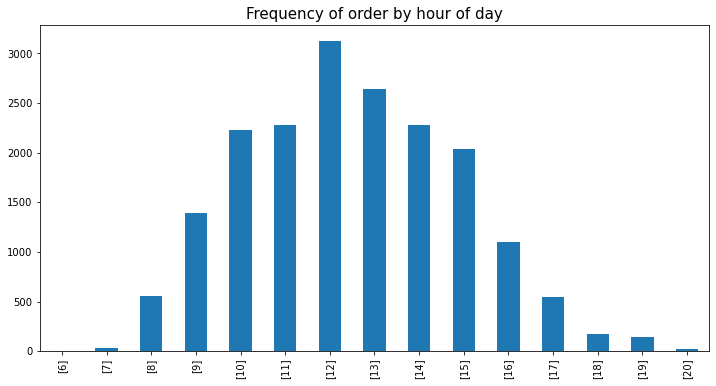

In [87]:
#How many orders made by hour in a day
plt.figure(figsize=(12,6))
plt.title("Frequency of order by hour of day", fontsize=15)
InvoiceDate = df3.groupby(['InvoiceNo'])['Hour'].unique()
(InvoiceDate.value_counts()).iloc[0:-1].sort_index().plot.bar()
#plt.savefig('Order_by_perHour-in-a-day.png')

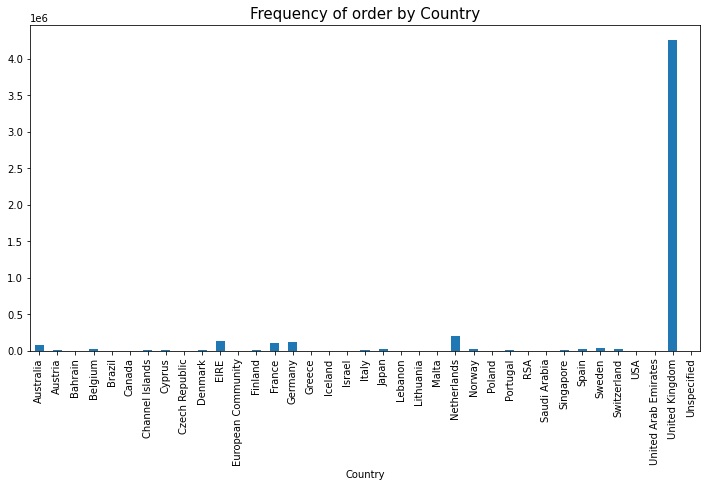

In [88]:
##Country base Transaction
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Country", fontsize=15)
df3.groupby(['Country'])['Quantity'].sum().plot.bar()

 

In [89]:
df3.groupby(['Description']).sum() ## Uniq iteam with quantity


,InvoiceNo,Year_Month,Month,Week,Day,Hour,Quantity,UnitPrice,Total_Sales,CustomerID
Description,,,,,,,,,,
4 PURPLE FLOCK DINNER CANDLES,22071282,7843042,342,1399,155,504,140,90.65,270.76,631941
50'S CHRISTMAS GIFT BAG LARGE,62400953,21921008,1108,4608,380,1392,1885,136.04,2272.25,1673997
DOLLY GIRL BEAKER,78530419,27753085,1285,5296,554,1761,2398,171.65,2759.50,2045940
I LOVE LONDON MINI BACKPACK,40027773,14077701,701,2908,267,869,360,289.70,1454.00,1089559
I LOVE LONDON MINI RUCKSACK,569720,201110,10,40,4,9,1,4.15,4.15,14646
...,...,...,...,...,...,...,...,...,...,...
ZINC T-LIGHT HOLDER STARS SMALL,134170028,47863675,1875,7625,820,3004,4894,199.20,3879.98,3609454
ZINC TOP 2 DOOR WOODEN SHELF,4924991,1809838,38,143,34,117,10,152.55,169.50,134854
ZINC WILLIE WINKIE CANDLE STICK,108002698,38611642,1542,6286,699,2408,2607,167.49,2176.95,2921778


In [90]:
#Write the EDA Data
df4=df3.to_csv('data_eda.csv',index=False)

In [91]:
#Implement the Time series 
#Time series is a set of observations on the values that a variable takes at different times

arima=pd.read_csv("data_eda.csv",parse_dates=['Date'],index_col="Date")


In [92]:
arima.index

DatetimeIndex(['2010-12-01', '2010-12-01', '2010-12-01', '2010-12-01',
               '2010-12-01', '2010-12-01', '2010-12-01', '2010-12-01',
               '2010-12-01', '2010-12-01',
               ...
               '2011-12-09', '2011-12-09', '2011-12-09', '2011-12-09',
               '2011-12-09', '2011-12-09', '2011-12-09', '2011-12-09',
               '2011-12-09', '2011-12-09'],
              dtype='datetime64[ns]', name='Date', length=397884, freq=None)

In [93]:
sales=arima['InvoiceDate'].min()

In [94]:
sales

'2010-12-01 08:26:00'

In [95]:
sales=arima['InvoiceDate'].max()

In [96]:
sales

'2011-12-09 12:50:00'

In [97]:
# Daily base resampling the Total Sales
ts = arima['Total_Sales'].resample('D').sum()

In [98]:
ts

Date
2010-12-01     46376.49
2010-12-02     47316.53
2010-12-03     23921.71
2010-12-04         0.00
2010-12-05     31771.60
                ...    
2011-12-05     58202.21
2011-12-06     46144.04
2011-12-07     69354.21
2011-12-08     50519.41
2011-12-09    184349.28
Freq: D, Name: Total_Sales, Length: 374, dtype: float64

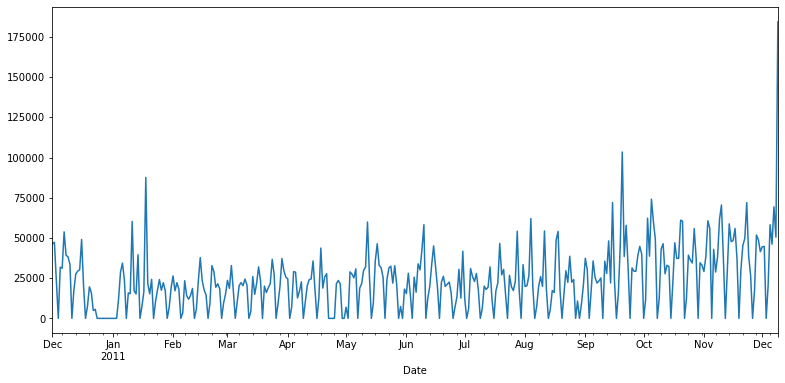

In [99]:
# Visualize the Data
ts.plot(figsize=(13,6))
plt.show()
#plt.savefig('TimeSeriesData.png')
            

In [100]:
#Checking the Null Values
ts.isnull().any()

False

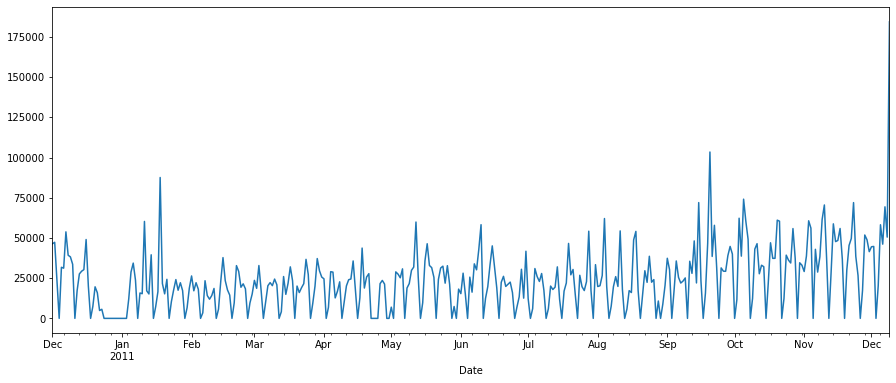

In [101]:
#Visualizing products Sales Time Series Data
ts.plot(figsize=(15, 6))
plt.show()

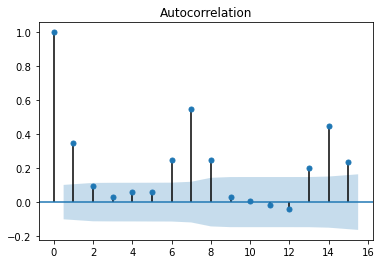

In [102]:
###ACF of Days

from pandas import Series
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts,lags=15)
pyplot.show()
#plt.savefig('acf.png')

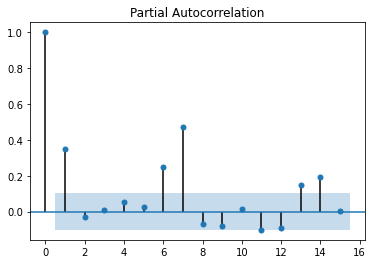

In [103]:
###PACF of Days
##Don't count it ,just printed the pacf
from pandas import Series
from matplotlib import pyplot
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
#series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
from statsmodels.graphics.tsaplots import plot_acf
#plot_acf(tsa)
plot_pacf(ts, lags=15)
pyplot.show()
#plt.savefig('pacf.svg')
#plt.plot(range(10), range(10))

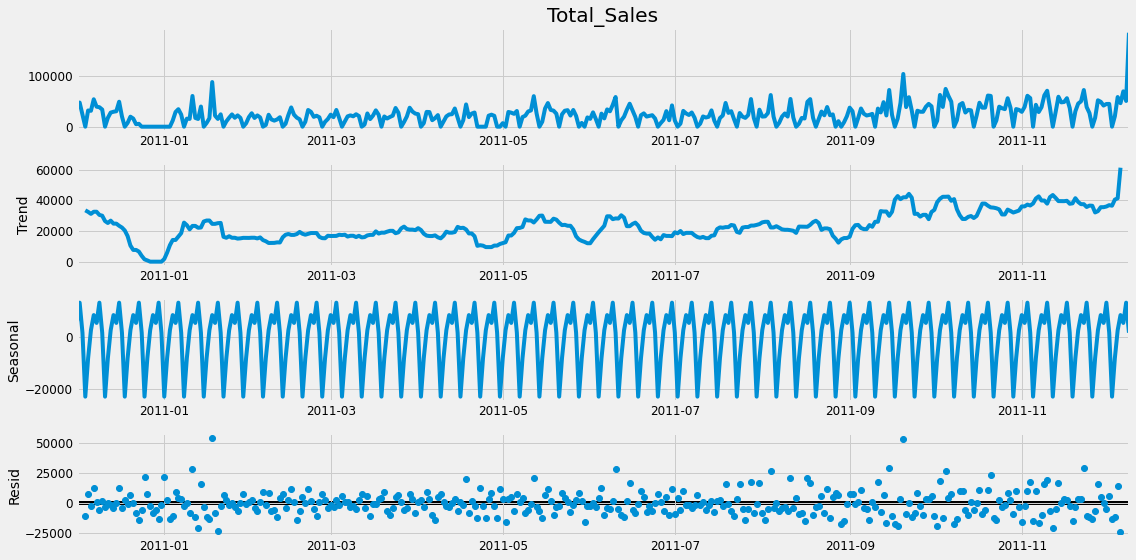

In [104]:
# Importing the requied liberly and visualize the Data
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()
#plt.savefig('Seasonal_decompose_Time_series_Data.png')

In [105]:
# Applying the Arima Model
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [106]:
#
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:8772.002278497801
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:8416.842291208173
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:8395.101842863549
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:7934.411216630001
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:8359.109248798646
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:8182.7329707945655
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:8040.796424001868
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:7902.722813750017
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:8583.89752616475
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8291.200335494277
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8327.278353806742
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:7899.271095382736
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:8321.006557946406
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8216.255788681692
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:7997.856120126575
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:7892.620255192845
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:8459.143758078948
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:8174.532187728872
ARIMA(0, 1

In [107]:
# Counting the fitting values in the model
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2171      0.247      0.881      0.378      -0.266       0.700
ma.L1          0.1446      0.250      0.579      0.563      -0.345       0.634
ar.S.L12      -0.2812      0.142     -1.983      0.047      -0.559      -0.003
ma.S.L12      -0.7646      0.084     -9.150      0.000      -0.928      -0.601
sigma2      6.452e+08   1.73e-09   3.73e+17      0.000    6.45e+08    6.45e+08


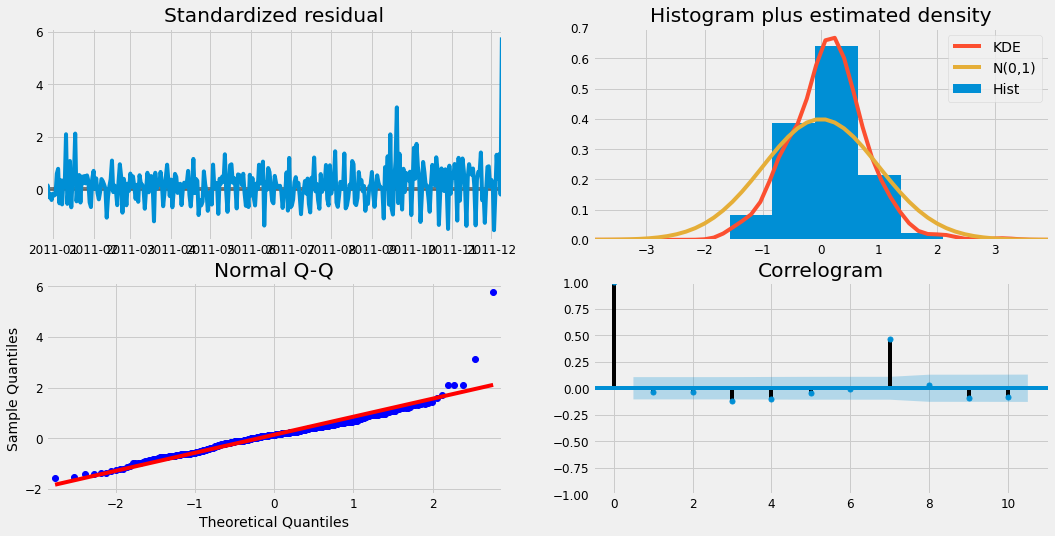

In [108]:
# Visualize the Time Series Model
results.plot_diagnostics(figsize=(16, 8))
plt.show()


#plt.savefig('Standardized_Residual.png')
            

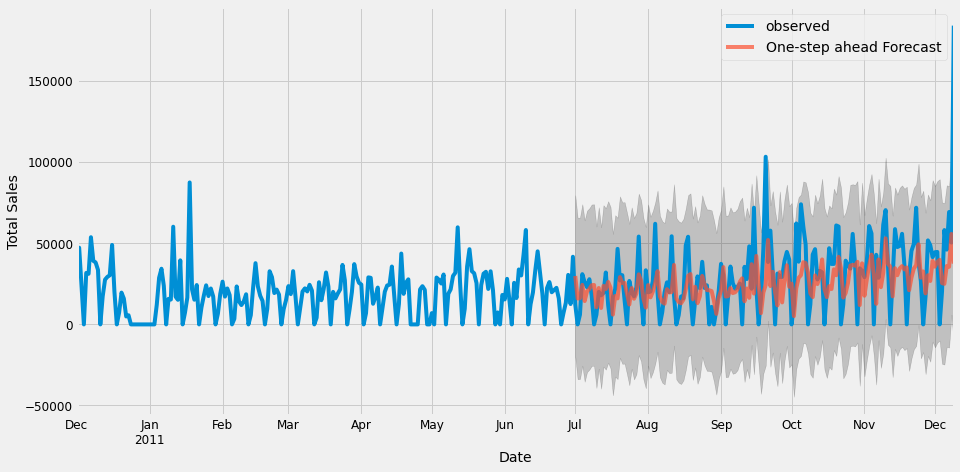

In [109]:
#Validating the forecasts
pred = results.get_prediction(start=pd.to_datetime('2011-07-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = ts['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Total Sales')
plt.legend()
plt.show()

#plt.savefig('Model_Validation.png')
            

In [110]:
# Mean Squared Error
y_forecasted = pred.predicted_mean
y_truth = ts['2011-07-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 502958073.48


In [111]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 22426.73


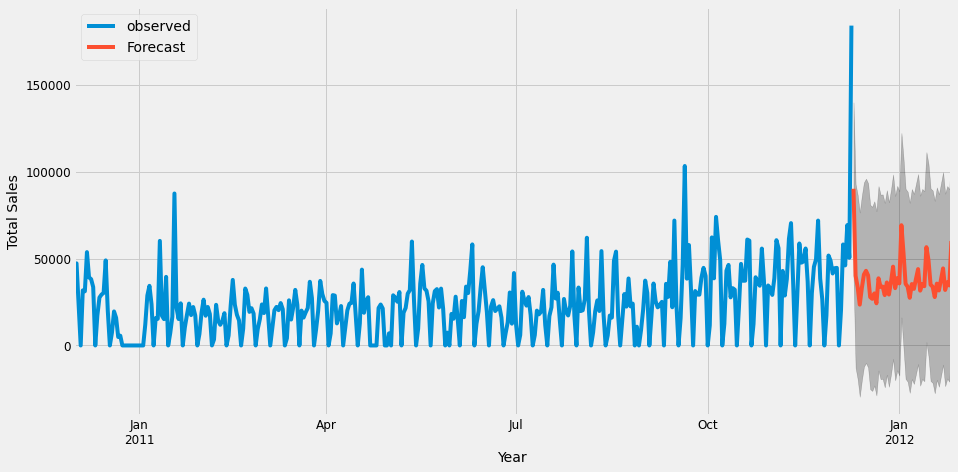

In [112]:
#Producing and visualizing forecasts
pred_uc = results.get_forecast(steps=48)
pred_ci = pred_uc.conf_int()
ax = ts.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Year')
ax.set_ylabel('Total Sales')
plt.legend()
plt.show()

#plt.savefig('Prediction.png')
            

In [113]:
##LINEAR REGRESSION IMPLEMENTATION TESTING ------------------------------------------------------------------------
###############################################################
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sb
%matplotlib inline

In [114]:
df_lr=pd.read_csv("data_eda.csv")

In [115]:
df_lr.head(5)

,InvoiceNo,InvoiceDate,Year_Month,Date,Month,Week,Day,Hour,Day_of_week,StockCode,Description,Quantity,UnitPrice,Total_Sales,CustomerID,Country
0,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,Wednesday,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,17850,United Kingdom
1,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,Wednesday,71053,WHITE METAL LANTERN,6,3.39,20.34,17850,United Kingdom
2,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,Wednesday,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,17850,United Kingdom
3,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,Wednesday,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,17850,United Kingdom
4,536365,2010-12-01 08:26:00,201012,2010-12-01,12,48,3,8,Wednesday,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,17850,United Kingdom


In [116]:
dflr=df_lr[['Week','Quantity','UnitPrice','Total_Sales']]

In [117]:
dflr.head(5)

,Week,Quantity,UnitPrice,Total_Sales
0,48,6,2.55,15.30
1,48,6,3.39,20.34
2,48,8,2.75,22.00
3,48,6,3.39,20.34
4,48,6,3.39,20.34


In [118]:
dflr=dflr.groupby('Week').sum()

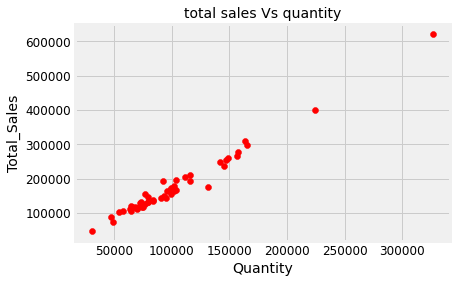

In [119]:
plt.scatter(dflr['Quantity'], dflr['Total_Sales'], color='red')
plt.title('total sales Vs quantity', fontsize=14)
plt.xlabel('Quantity', fontsize=14)
plt.ylabel('Total_Sales', fontsize=14)
plt.grid(True)
plt.show()



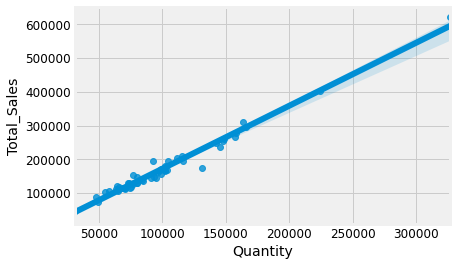

In [120]:
sb.regplot(x='Quantity',y='Total_Sales',data=dflr)

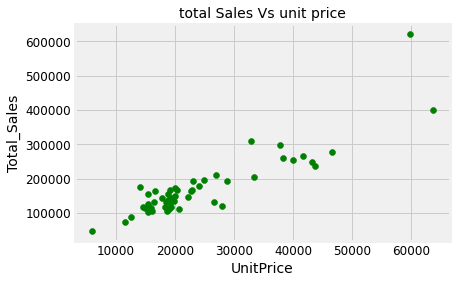

In [121]:
plt.scatter(dflr['UnitPrice'], dflr['Total_Sales'], color='green')
plt.title('total Sales Vs unit price', fontsize=14)
plt.xlabel('UnitPrice', fontsize=14)
plt.ylabel('Total_Sales', fontsize=14)
plt.grid(True)
plt.show()

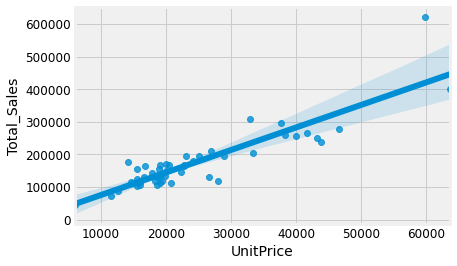

In [122]:
sb.regplot(x='UnitPrice',y='Total_Sales',data=dflr)

In [123]:
#Multiple Linear regression prediction
import statsmodels.api as sm

X = dflr[['Quantity','UnitPrice']] # here we have 3 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = dflr['Total_Sales']

predictors = ['Quantity','UnitPrice']
X = dflr[predictors]
Y = dflr['Total_Sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, Y)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


# prediction with sklearn

New_Quantity = 70192
New_UnitPrice=15992.100
print ('Predicted Total_Sales: \n', regr.predict([[New_Quantity,New_UnitPrice]]))


# with statsmodels
#X = sm.add_constant(X) # adding a constant

#model = sm.OLS(Y, X).fit()
#predictions = model.predict(X) 

#print_model = model.summary()
#print(print_model)

Intercept: 
 -15747.347025093884
Coefficients: 
 [1.74334681 0.56873686]
Predicted Total_Sales: 
 [115716.94875044]


In [124]:
# Checking the accuracy

from sklearn.metrics import r2_score
print(r2_score(lm.predict(X), Y))

0.9777136414864498


In [125]:
## check the predection result of the model
-15747.347025093884+(1.74334681)*(70192)+(15992.100)*(0.56873686)

115716.94900123212

In [126]:
# Checking the accuracy

from sklearn.metrics import r2_score
print(r2_score(lm.predict(X), Y))

0.9777136414864498
